# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Findings:

1. Temprature decreases as you move away from the equator (i.e 0 degree lattitude)

2. In Norther hemishphere temprature and latitude are positively correlated, while the relation is negative for    southern hemisphere.
 
3. There is no/weak relation between lattitude and Humidity, Cloudiness, Wind Speed.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [32]:
#Base URL

base_url = url = "http://api.openweathermap.org/data/2.5/weather?"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
city_list = []

citi_list = []

lat_list = []

lon_list = []

temp_list = []

hum_list = []

wind_list = []

cloud_list = []

country_list = []

date_list = []

print('Beginning Data Retrieval')

print('--------------------------')

for index, city in enumerate(cities):
    
    url = (f"{base_url}q={city}&appid={weather_api_key}&units=imperial")
    
    response = requests.get(url).json()
    
    time.sleep(1)
    
    city_list.append(response)
    
    try:
        city = response["name"]
        
        print(f'Processing record {index+1} for {city}')
        
    except:
        
        print('city not found. Skipping ..')
    
for city in city_list:
    
    if city['cod'] == 200:
        
        cit = city['name']
    
        citi_list.append(cit)
    
        lat = city['coord']['lat']
    
        lat_list.append(lat)
    
        lon = city['coord']['lon']
    
        lon_list.append(lon)
    
        dt = city['dt']
    
        date_list.append(dt)
    
        cntry = city['sys']["country"]
    
        country_list.append(cntry)
    
        temp = city['main']['temp_max']
    
        temp_list.append(temp)
    
        hum = city['main']['humidity']
    
        hum_list.append(hum)
    
        win = city['wind']['speed']
    
        wind_list.append(win)
    
        clo = city['clouds']['all']
    
        cloud_list.append(clo)  

Beginning Data Retrieval
--------------------------
Processing record 1 for Opunake
Processing record 2 for Pangnirtung
Processing record 3 for Punta Arenas
Processing record 4 for Albany
Processing record 5 for Bredasdorp
Processing record 6 for Torbay
Processing record 7 for Nishihara
Processing record 8 for Arkhipo-Osipovka
Processing record 9 for Kazachinskoye
Processing record 10 for Hilo
Processing record 11 for Severo-Kuril'sk
Processing record 12 for Shimoda
Processing record 13 for Flinders
Processing record 14 for Camacha
city not found. Skipping ..
Processing record 16 for Ribeira Grande
Processing record 17 for Arraial do Cabo
Processing record 18 for San Policarpo
Processing record 19 for Khatanga
Processing record 20 for Guerrero Negro
Processing record 21 for Aklavik
Processing record 22 for Tilichiki
Processing record 23 for Sørland
city not found. Skipping ..
Processing record 25 for Sinnamary
Processing record 26 for Tura
city not found. Skipping ..
Processing record 

Processing record 238 for Puerto del Rosario
Processing record 239 for Adrar
Processing record 240 for Hervey Bay
Processing record 241 for Marawi
Processing record 242 for Mushie
Processing record 243 for Mogok
Processing record 244 for Hamilton
Processing record 245 for Kruisfontein
Processing record 246 for Sola
Processing record 247 for Øksfjord
Processing record 248 for Villa de Reyes
Processing record 249 for Novobirilyussy
Processing record 250 for Tieli
Processing record 251 for Tazovsky
Processing record 252 for Hue
Processing record 253 for Isangel
Processing record 254 for Kachug
Processing record 255 for Nísia Floresta
Processing record 256 for Ust-Nera
Processing record 257 for Najrān
city not found. Skipping ..
Processing record 259 for Nome
Processing record 260 for Ostrovnoy
Processing record 261 for Kumul
Processing record 262 for Abu Dhabi
Processing record 263 for Seryshevo
Processing record 264 for Galveston
Processing record 265 for Kargasok
Processing record 266 f

Processing record 473 for Salym
Processing record 474 for Salalah
Processing record 475 for Görele
Processing record 476 for Zuya
Processing record 477 for Yar-Sale
Processing record 478 for Bria
Processing record 479 for Seymchan
Processing record 480 for Malbork
Processing record 481 for Salihli
Processing record 482 for Kholm-Zhirkovskiy
Processing record 483 for Gra Lygia
Processing record 484 for Baijiantan
Processing record 485 for Ancud
Processing record 486 for Yong’an
Processing record 487 for Saldanha
Processing record 488 for Dawei
Processing record 489 for Anadyr
Processing record 490 for Vinkovci
Processing record 491 for Yantzaza
Processing record 492 for Vilyuysk
Processing record 493 for Alvorada
Processing record 494 for Isnos
Processing record 495 for Harper
Processing record 496 for Zuwārah
Processing record 497 for Kholtoson
Processing record 498 for Cayenne
Processing record 499 for Hurghada
Processing record 500 for Ladário
Processing record 501 for Barra de Tecoa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# Create a Data Frame

df = pd.DataFrame(list(zip(citi_list,cloud_list,country_list,date_list,hum_list,lat_list,lon_list,temp_list,wind_list ))
            ,columns=['City', 'Cloudiness','Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# Export to csv

df.to_csv(output_data_file, index=False)

df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [38]:
# Read from the csv file

weather_df = pd.read_csv(output_data_file)

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Opunake,87,NZ,1586799408,84,-39.46,173.86,48.99,10.00
1,Pangnirtung,90,CA,1586798953,92,66.15,-65.71,17.60,13.87
2,Punta Arenas,75,CL,1586799188,62,-53.15,-70.92,51.80,31.09
3,Albany,90,US,1586799210,82,42.60,-73.97,63.00,20.80
4,Bredasdorp,2,ZA,1586799413,59,-34.53,20.04,60.80,6.02


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

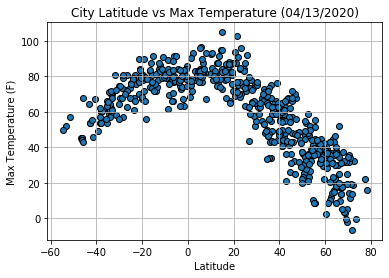

In [39]:
plt.scatter(x = weather_df['Lat'], y = weather_df['Max Temp'],edgecolors='black')

plt.title('City Latitude vs Max Temperature (04/13/2020)')

plt.xlabel('Latitude')

plt.ylabel('Max Temperature (F)')

plt.grid()

#### Latitude vs. Humidity Plot

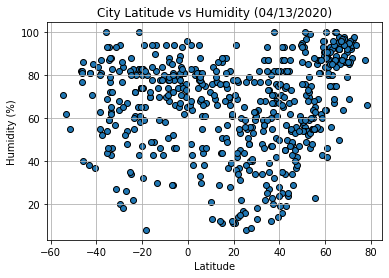

In [40]:
plt.scatter(x = weather_df['Lat'], y = weather_df['Humidity'],edgecolors='black')

plt.title('City Latitude vs Humidity (04/13/2020)')

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

plt.grid()

#### Latitude vs. Cloudiness Plot

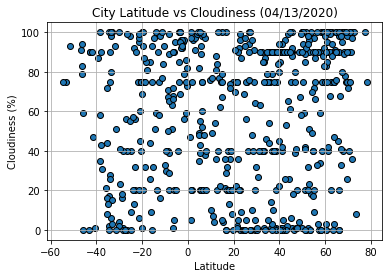

In [41]:
plt.scatter(x = weather_df['Lat'], y = weather_df['Cloudiness'],edgecolors='black')

plt.title('City Latitude vs Cloudiness (04/13/2020)')

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

plt.grid()

#### Latitude vs. Wind Speed Plot

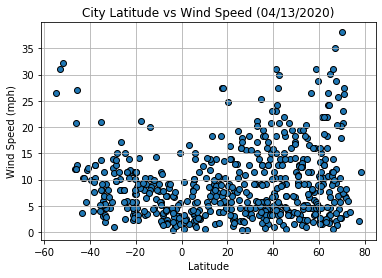

In [42]:
plt.scatter(x = weather_df['Lat'], y = weather_df['Wind Speed'],edgecolors='black')

plt.title('City Latitude vs Wind Speed (04/13/2020)')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (mph)')

plt.grid()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [50]:
# Create Northern and Southern Hemisphere DataFrames

north_df = weather_df.loc[weather_df['Lat'] >= 0]

south_df = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7810186212068292


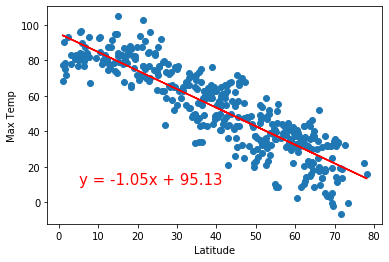

In [75]:
x_values = north_df.iloc[:,5]

y_values = north_df.iloc[:,7]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

_ = plt.scatter(x_values, y_values)

_ = plt.plot(x_values,regress_values,"r-")

_ = plt.annotate(line_eq,(5,10),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Max Temp')


print(f'The r-squared value is: {rvalue**2}')

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5234309588540573


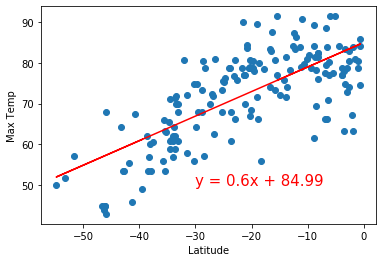

In [76]:
x_values2 = south_df.iloc[:,5]

y_values2 = south_df.iloc[:,7]

(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values2, y_values2)

regress_values2 = x_values2 * slope2 + intercept2

line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

_ = plt.scatter(x_values2, y_values2)

_ = plt.plot(x_values2,regress_values2,"r-")

_ = plt.annotate(line_eq2,(-30,50),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Max Temp')


print(f'The r-squared value is: {rvalue2**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.14416683542869155


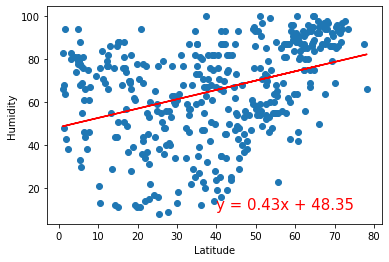

In [78]:
x_values3 = north_df.iloc[:,5]

y_values3 = north_df.iloc[:,4]

(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values3, y_values3)

regress_values3 = x_values3 * slope3 + intercept3

line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

_ = plt.scatter(x_values3, y_values3)

_ = plt.plot(x_values3,regress_values3,"r-")

_ = plt.annotate(line_eq3,(40,10),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Humidity')


print(f'The r-squared value is: {rvalue3**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.00973136015262433


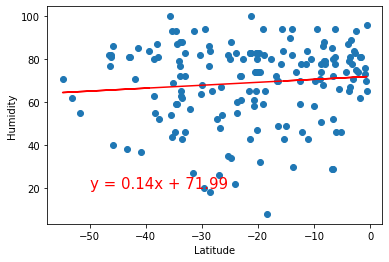

In [80]:
x_values4 = south_df.iloc[:,5]

y_values4 = south_df.iloc[:,4]

(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(x_values4, y_values4)

regress_values4 = x_values4 * slope4 + intercept4

line_eq4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))

_ = plt.scatter(x_values4, y_values4)

_ = plt.plot(x_values4,regress_values4,"r-")

_ = plt.annotate(line_eq4,(-50,20),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Humidity')


print(f'The r-squared value is: {rvalue4**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.03520035994531654


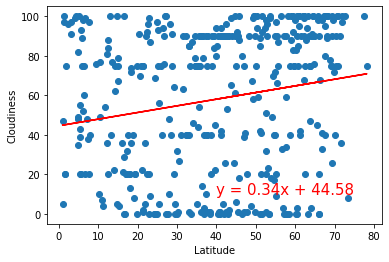

In [81]:
x_values5 = north_df.iloc[:,5]

y_values5 = north_df.iloc[:,1]

(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(x_values5, y_values5)

regress_values5 = x_values5 * slope5 + intercept5

line_eq5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

_ = plt.scatter(x_values5, y_values5)

_ = plt.plot(x_values5,regress_values5,"r-")

_ = plt.annotate(line_eq5,(40,10),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Cloudiness')


print(f'The r-squared value is: {rvalue5**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.03357620151667145


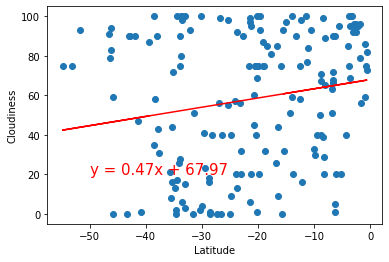

In [82]:
x_values6 = south_df.iloc[:,5]

y_values6 = south_df.iloc[:,1]

(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(x_values6, y_values6)

regress_values6 = x_values6 * slope6 + intercept6

line_eq6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

_ = plt.scatter(x_values6, y_values6)

_ = plt.plot(x_values6,regress_values6,"r-")

_ = plt.annotate(line_eq6,(-50,20),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Cloudiness')


print(f'The r-squared value is: {rvalue6**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.038605986848891514


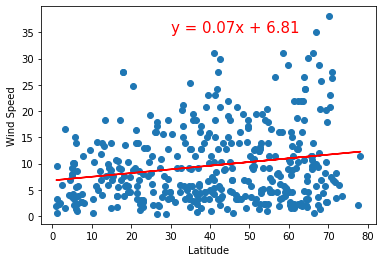

In [86]:
x_values7 = north_df.iloc[:,5]

y_values7 = north_df.iloc[:,8]

(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(x_values7, y_values7)

regress_values7 = x_values7 * slope7 + intercept7

line_eq7 = "y = " + str(round(slope7,2)) + "x + " + str(round(intercept7,2))

_ = plt.scatter(x_values7, y_values7)

_ = plt.plot(x_values7,regress_values7,"r-")

_ = plt.annotate(line_eq7,(30,35),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Wind Speed')


print(f'The r-squared value is: {rvalue7**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.24442409984291993


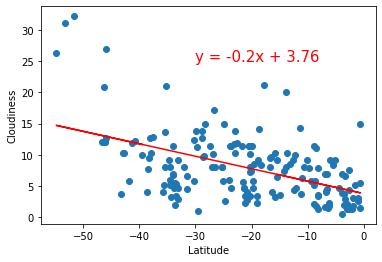

In [89]:
x_values8 = south_df.iloc[:,5]

y_values8 = south_df.iloc[:,8]

(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(x_values8, y_values8)

regress_values8 = x_values8 * slope8 + intercept8

line_eq8 = "y = " + str(round(slope8,2)) + "x + " + str(round(intercept8,2))

_ = plt.scatter(x_values8, y_values8)

_ = plt.plot(x_values8,regress_values8,"r-")

_ = plt.annotate(line_eq8,(-30,25),fontsize=15,color="red")

_ = plt.xlabel('Latitude')

_ = plt.ylabel('Cloudiness')


print(f'The r-squared value is: {rvalue8**2}')